# PRAKTIKUM 1

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah
k
k yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

Perhitungan Manual KMeans

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Mesin Learning/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* pandas digunakan untuk memanipulasi data dalam bentuk DataFrame, yaitu struktur data tabular (tabel) yang banyak digunakan dalam analisis data.
* numpy adalah pustaka untuk komputasi numerik, khususnya operasi pada array/matriks.
* matplotlib.pyplot digunakan untuk membuat visualisasi data seperti grafik.
* KMeans dari sklearn.cluster adalah algoritma clustering yang digunakan untuk membagi data ke dalam kelompok atau cluster berdasarkan kemiripan.
* df = pd.read_csv('/content/drive/MyDrive/Mesin Learning/iris.csv') : Baris ini membaca file CSV yang berisi dataset Iris dan menyimpannya ke dalam variabel df sebagai DataFrame. File tersebut terletak di Google Drive.
* df.head() : Baris ini menampilkan 5 baris pertama dari DataFrame df. Ini berguna untuk memverifikasi apakah dataset telah berhasil diimpor dengan benar serta melihat sekilas struktur dan isinya.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* from google.colab import drive : Baris ini mengimpor modul drive dari pustaka google.colab. Modul ini menyediakan fungsi untuk menghubungkan Google Colab dengan Google Drive, sehingga Anda dapat mengakses file yang disimpan di Drive dari lingkungan Colab.
* drive.mount('/content/drive') : digunakan untuk "mount" Google Drive ke dalam sistem file Google Colab, sehingga Drive akan muncul sebagai direktori di Colab.

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X menyimpan fitur yang akan digunakan dalam model, sementara y menyimpan target atau label yang ingin diprediksi. Pada dataset Iris, kolom terakhir biasanya berisi label spesies bunga (Setosa, Versicolor, atau Virginica), sementara kolom lainnya berisi fitur-fitur seperti panjang dan lebar sepal/petal.

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


df.head() : Baris ini menampilkan 5 baris pertama dari DataFrame df. Ini berguna untuk memverifikasi apakah dataset telah berhasil diimpor dengan benar serta melihat sekilas struktur dan isinya.

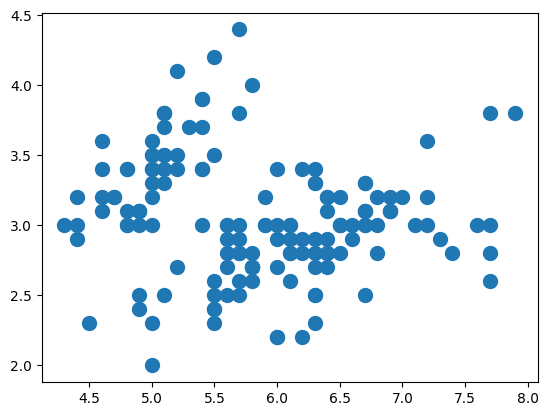

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

 Kode ini menghasilkan scatter plot untuk dua fitur pertama dari dataset, yang berguna untuk melihat distribusi atau pola dalam data, seperti apakah ada cluster atau korelasi antara kedua fitur tersebut.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

* from sklearn.cluster import KMeans : Baris ini mengimpor algoritma KMeans dari pustaka scikit-learn. KMeans adalah algoritma unsupervised yang digunakan untuk mengelompokkan data ke dalam sejumlah cluster berdasarkan kesamaan fitur.
* cl_kmeans = KMeans(n_clusters=2) : KMeans(n_clusters=2): Membuat objek KMeans dengan parameter n_clusters=2, artinya kita ingin membagi data ke dalam 2 cluster. Meskipun dataset Iris sebenarnya memiliki 3 kelas, dalam hal ini diasumsikan bahwa kita tidak tahu jumlah kelas dan ingin mencoba k=2.
* y_kmeans = cl_kmeans.fit_predict(X) : cl_kmeans.fit_predict(X):
fit_predict() adalah kombinasi dari dua langkah:
fit(X): Memasang model KMeans ke data X. Algoritma KMeans akan menghitung centroid untuk masing-masing cluster.
predict(X): Setelah model dipasang, setiap data pada X akan diklasifikasikan ke dalam cluster terdekat berdasarkan posisi centroid.
y_kmeans: Variabel ini akan menyimpan hasil prediksi berupa label cluster untuk setiap data. Nilai-nilai di y_kmeans akan berupa 0 atau 1, yang menunjukkan apakah sebuah data termasuk ke dalam cluster pertama (0) atau kedua (1).


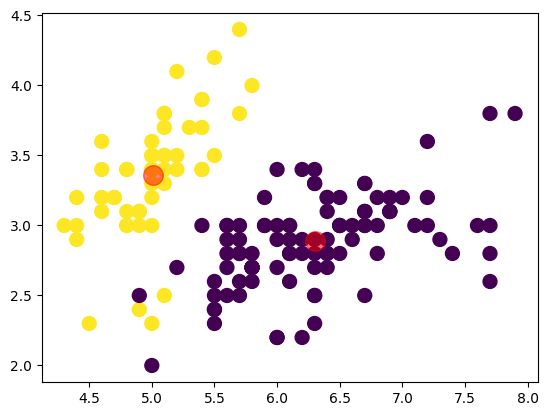

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans) : Plot ini akan menampilkan titik-titik yang mewakili data bunga berdasarkan panjang dan lebar kelopak bunga (Sepal Length dan Sepal Width), dengan warna yang berbeda sesuai dengan cluster yang diprediksi oleh model KMeans.
* centers = cl_kmeans.cluster_centers_ : cl_kmeans.cluster_centers_: Atribut ini menyimpan koordinat centroid untuk masing-masing cluster. Setelah KMeans melakukan clustering, centroid adalah titik-titik yang mewakili pusat dari setiap cluster.
centers: Variabel ini menyimpan koordinat centroid untuk 2 cluster yang ditemukan oleh model KMeans.
* plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5) : Centroid dari masing-masing cluster akan ditampilkan sebagai titik merah besar di tengah-tengah cluster yang terbentuk dari data.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Kode ini mencetak nilai SSE (Sum of Squared Errors) dari model KMeans untuk memberikan wawasan mengenai seberapa efektif model KMeans dalam mengelompokkan data ke dalam cluster yang telah ditentukan (dalam hal ini, 2 cluster).

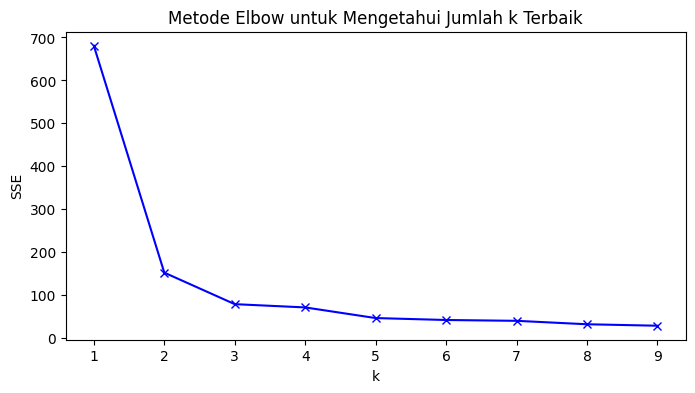

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

* sse adalah list kosong yang akan digunakan untuk menyimpan nilai SSE dari setiap model KMeans dengan jumlah cluster yang berbeda.
* K adalah rentang nilai k yang akan diuji, yaitu dari 1 hingga 9. Kita mencoba berbagai jumlah cluster untuk menemukan jumlah cluster terbaik.
* for k in K:: Loop untuk setiap nilai k dari 1 hingga 9.
* KMeans(n_clusters=k): Membuat model KMeans dengan k cluster.
* kmeanModel.fit(X): Model KMeans di-fit pada data X (data fitur yang telah dipilih). Algoritma KMeans menghitung centroid dan membuat clustering sesuai dengan nilai k.
* sse.append(kmeanModel.inertia_): Nilai SSE untuk setiap model KMeans dengan k cluster disimpan ke dalam list sse. kmeanModel.inertia_ menyimpan nilai SSE untuk model yang dibuat.
* plt.figure(figsize=(8,4)): Membuat figure (plot) dengan ukuran 8x4 inci.
* plt.plot(K, sse, "bx-"):
* Fungsi plt.plot() membuat plot garis.
* K adalah daftar nilai k pada sumbu x.
* sse adalah nilai SSE yang sesuai untuk setiap nilai k pada sumbu y.
* "bx-": Menentukan warna dan bentuk marker, di mana:
b untuk warna biru.
x untuk bentuk marker "x".
- untuk garis yang menghubungkan marker.
* plt.xlabel("k"): Memberikan label pada sumbu x, yaitu "k" (jumlah cluster).
* plt.ylabel("SSE"): Memberikan label pada sumbu y, yaitu "SSE" (Sum of Squared Errors).
* plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik"): Menambahkan judul pada plot.
* plt.show(): Menampilkan plot.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=71.34044682436698
k=5; SSE=46.56163015873017
k=6; SSE=42.05284622728318
k=7; SSE=40.123733225762294
k=8; SSE=32.120510101010105
k=9; SSE=28.724419921409854


* for idx, sse_val in enumerate(sse, start=1)::

* enumerate(sse, start=1): Fungsi enumerate() digunakan untuk mengiterasi objek yang dapat diiterasi (dalam hal ini list sse), sekaligus menghasilkan indeks untuk setiap elemen.
* sse adalah list yang berisi nilai SSE dari setiap model KMeans yang telah dihitung sebelumnya.
* start=1 berarti indeks dimulai dari 1 (karena kita mengasosiasikan jumlah cluster k dengan nilai SSE, dan k dimulai dari 1).
* idx: Variabel yang menyimpan indeks saat ini dari loop, yang merepresentasikan nilai k (jumlah cluster).
* sse_val: Variabel yang menyimpan nilai SSE yang terkait dengan jumlah cluster k
* print(f'k={idx}; SSE={sse_val}'):
Menggunakan f-string untuk mencetak teks dan nilai variabel.
* k={idx}: Menampilkan jumlah cluster k (diambil dari indeks idx).
* SSE={sse_val}: Menampilkan nilai SSE yang sesuai dengan jumlah cluster k (dari sse_val).

# PRAKTIKUM 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

* import matplotlib.pyplot as plt : modul dari pustaka matplotlib yang digunakan untuk membuat grafik dan visualisasi data.
* import seaborn as sns; sns.set() : seaborn adalah pustaka visualisasi yang dibangun di atas matplotlib. Seaborn memberikan tampilan yang lebih estetis dan fitur tambahan untuk visualisasi statistik. sns.set() digunakan untuk mengatur gaya visualisasi default. Dengan memanggil fungsi ini, Anda mendapatkan tema yang lebih menarik dan profesional untuk plot yang Anda buat.
* import numpy as np : numpy adalah pustaka yang digunakan untuk komputasi numerik di Python. Ini sangat berguna untuk manipulasi array, operasi matematis, dan pengolahan data.


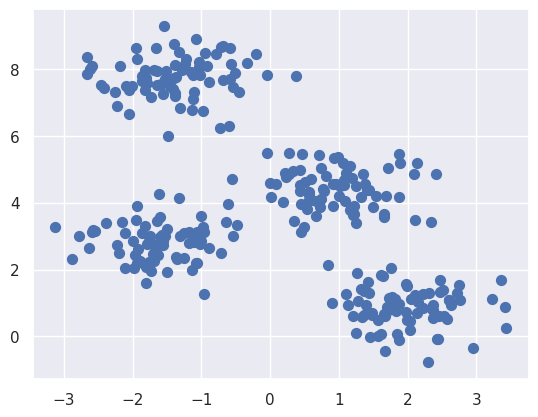

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

* from sklearn.datasets import make_blobs : make_blobs adalah fungsi dari pustaka sklearn.datasets yang digunakan untuk menghasilkan dataset sintetik (buatan) dengan distribusi berbentuk cluster.
* X: Variabel ini menyimpan koordinat fitur dari titik data yang dihasilkan. Ini adalah array 2D di mana setiap baris mewakili satu titik data, dan setiap kolom mewakili dimensi (fitur).
* y_true: Variabel ini menyimpan label asli (benar) untuk setiap titik data. Label ini menunjukkan ke cluster mana setiap titik data seharusnya termasuk, tetapi ini biasanya tidak digunakan dalam algoritma pengelompokan.
* plt.scatter(X[:, 0], X[:, 1], s=50); : plt.scatter(): Fungsi ini digunakan untuk membuat scatter plot (grafik sebar) untuk memvisualisasikan titik data.
X[:, 0]: Ini mengambil semua baris (:) dan kolom pertama (fitur 1) dari array X. Ini adalah koordinat x dari titik data.
X[:, 1]: Ini mengambil semua baris dan kolom kedua (fitur 2) dari array X. Ini adalah koordinat y dari titik data.
s=50: Ini menentukan ukuran titik (marker) pada scatter plot. Dalam hal ini, ukuran titik ditetapkan ke 50.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

* KMeans adalah algoritma pengelompokan (clustering) yang digunakan untuk membagi data ke dalam k cluster berdasarkan kedekatan (similarity).
* kmeans = KMeans(n_clusters=4) : n_clusters=4: Parameter ini menentukan jumlah cluster yang ingin Anda buat. Dalam hal ini, Anda mengatur model untuk mencari 4 cluster dalam data.
* fit(X): Fungsi ini digunakan untuk melatih model KMeans menggunakan data yang diberikan.
* X: Merupakan dataset (array 2D) yang berisi titik-titik data yang ingin dikelompokkan. Model akan menemukan pusat cluster (centroids) berdasarkan titik data ini.
* y_kmeans = kmeans.predict(X) : predict(X): Fungsi ini digunakan untuk memprediksi cluster untuk setiap titik data dalam dataset X berdasarkan model yang telah dilatih.
y_kmeans: Variabel ini menyimpan hasil prediksi, yang merupakan label cluster untuk setiap titik data dalam X. Label ini menunjukkan ke cluster mana masing-masing titik data termasuk.

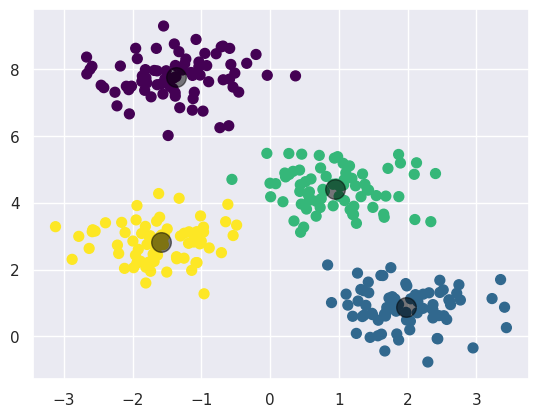

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

* plt.scatter(): Membuat scatter plot untuk memvisualisasikan titik data.
* X[:, 0]: Mengambil nilai fitur pertama (koordinat x) dari dataset X.
* X[:, 1]: Mengambil nilai fitur kedua (koordinat y) dari dataset X.
* c=y_kmeans: Mewarnai titik berdasarkan label cluster yang dihasilkan oleh KMeans.
* s=50: Menentukan ukuran titik menjadi 50.
* cmap='viridis': Menggunakan palet warna viridis untuk memberikan gradasi warna pada cluster.
* centers: Menyimpan koordinat pusat cluster yang dihasilkan oleh model KMeans setelah pelatihan.
* kmeans.cluster_centers_: Mengakses atribut yang menyimpan posisi pusat dari masing-masing cluster.
* plt.scatter(): Membuat scatter plot untuk menampilkan pusat cluster.
* centers[:, 0]: Mengambil nilai x dari pusat cluster.
* centers[:, 1]: Mengambil nilai y dari pusat cluster.
* c='black': Mewarnai titik pusat cluster menjadi hitam.
* s=200: Menentukan ukuran titik pusat cluster menjadi 200, sehingga lebih besar dan terlihat jelas.
* alpha=0.5: Mengatur transparansi titik pusat cluster, membuatnya setengah transparan.

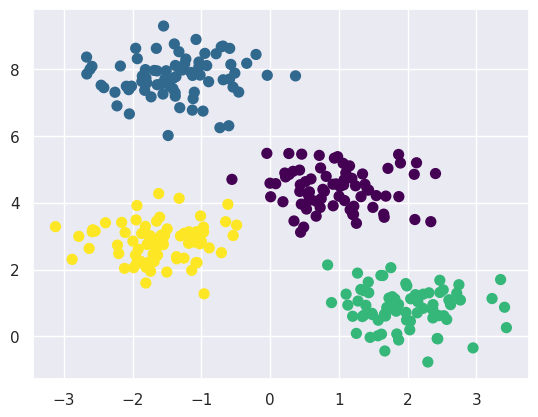

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

* pairwise_distances_argmin: Fungsi ini digunakan untuk menghitung jarak terdekat antara titik data dan pusat cluster, kemudian mengembalikan indeks cluster yang terdekat untuk setiap titik.
* find_clusters: Mendefinisikan fungsi yang akan menemukan cluster berdasarkan dataset X dan jumlah cluster yang diinginkan (n_clusters).
* rseed=2: Parameter opsional untuk menetapkan seed random untuk menghasilkan hasil yang konsisten.
* rng: Membuat objek generator angka acak dengan seed yang ditentukan.
* i = rng.permutation(X.shape[0])[:n_clusters]: Mengacak indeks dari titik data dan memilih n_clusters indeks pertama. Ini akan digunakan untuk memilih pusat cluster awal secara acak.
* centers = X[i]: Menginisialisasi pusat cluster dengan memilih titik data sesuai indeks yang diacak.
* while True:: Memulai loop yang akan terus berlanjut hingga konvergensi tercapai.
* labels = pairwise_distances_argmin(X, centers) : Menghitung label untuk setiap titik data dengan menemukan pusat cluster terdekat. Hasilnya adalah array labels yang menunjukkan cluster mana yang paling dekat untuk setiap titik.
* new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]) : Menghitung pusat baru untuk setiap cluster dengan mengambil rata-rata dari titik-titik data yang memiliki label cluster yang sama.
* if np.all(centers == new_centers):
    break
centers = new_centers : Mengecek apakah pusat cluster baru sama dengan pusat cluster sebelumnya. Jika iya, loop berhenti karena konvergensi tercapai. Jika tidak, pusat cluster diperbarui dengan pusat baru.
* return centers, labels : Mengembalikan pusat cluster akhir dan label untuk setiap titik data.
* centers, labels = find_clusters(X, 4) : Memanggil fungsi find_clusters dengan dataset X dan jumlah cluster yang diinginkan (4). Hasilnya disimpan dalam centers dan labels.
* plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'); : Membuat scatter plot untuk memvisualisasikan titik data dengan warna berdasarkan label cluster yang dihasilkan oleh fungsi. Setiap cluster diwarnai dengan warna yang berbeda, sesuai dengan palet viridis.


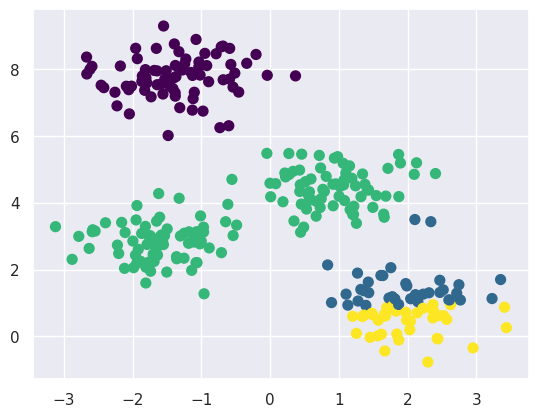

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

* find_clusters(X, 4, rseed=0): Memanggil fungsi find_clusters yang telah didefinisikan sebelumnya.
* X: Dataset yang digunakan untuk melakukan clustering.
* 4: Jumlah cluster yang diinginkan (dalam hal ini 4 cluster).
* rseed=0: Seed untuk menginisialisasi generator angka acak, digunakan untuk memastikan pemilihan pusat cluster awal yang konsisten. Dengan seed 0, hasil clustering akan tetap sama setiap kali kode dijalankan.
* centers, labels: Fungsi ini mengembalikan dua nilai:
* centers: Posisi pusat cluster akhir yang ditemukan oleh algoritma.
* labels: Array yang menunjukkan label (cluster) untuk setiap titik data dalam X berdasarkan cluster terdekatnya.
* plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'); : plt.scatter(): Membuat scatter plot untuk memvisualisasikan hasil clustering.
* X[:, 0]: Mengambil nilai fitur pertama (koordinat x) dari dataset X untuk setiap titik data.
* X[:, 1]: Mengambil nilai fitur kedua (koordinat y) dari dataset X untuk setiap titik data.
* c=labels: Mewarnai setiap titik data berdasarkan nilai label yang dihasilkan dari fungsi find_clusters, yang menunjukkan cluster mana setiap titik data berada.
* s=50: Menetapkan ukuran titik pada scatter plot menjadi 50.
* cmap='viridis': Menggunakan palet warna viridis untuk memberikan warna yang berbeda pada setiap cluster.

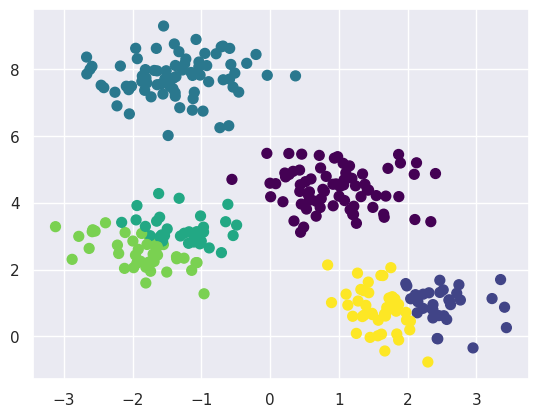

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* labels = KMeans(6, random_state=0).fit_predict(X):

* KMeans(6, random_state=0): Membuat model KMeans dengan jumlah cluster yang diinginkan, yaitu 6 cluster.
* Angka 6 menunjukkan bahwa model akan membagi data menjadi 6 cluster.
* random_state=0: Menetapkan seed untuk menghasilkan hasil yang dapat direproduksi. Ini memastikan bahwa hasilnya akan sama setiap kali Anda menjalankan kode.
* .fit_predict(X): Model KMeans ini akan melakukan dua hal:
* fit(X): Melatih model KMeans pada data X (melakukan proses clustering).
* predict(X): Menghasilkan label cluster untuk setiap titik data pada X.
* labels: Hasil dari fit_predict adalah array yang menyimpan label cluster (dari 0 hingga 5, karena ada 6 cluster) yang diberikan ke masing-masing titik data pada X.
* plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):

* plt.scatter(X[:, 0], X[:, 1], ...): Membuat scatter plot menggunakan dua kolom pertama dari X untuk koordinat sumbu-x dan sumbu-y. Artinya, sumbu-x adalah nilai dari kolom pertama X, dan sumbu-y adalah nilai dari kolom kedua X.
* c=labels: Memberikan warna berbeda untuk setiap titik data berdasarkan label cluster yang telah dihasilkan sebelumnya oleh KMeans. Ini membuat setiap cluster memiliki warna yang berbeda.
* s=50: Menetapkan ukuran setiap titik dalam plot menjadi 50 piksel.
* cmap='viridis': Menggunakan skema warna viridis untuk mewarnai titik-titik di dalam plot, berdasarkan label cluster mereka.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

* from sklearn.datasets import make_moons: Mengimpor fungsi make_moons dari modul Scikit-learn, yang digunakan untuk menghasilkan dataset dua dimensi berbentuk bulan sabit (moons). Dataset ini sering digunakan untuk masalah klasifikasi yang non-linear.
* X, y = make_moons(200, noise=.05, random_state=0):

* make_moons(200, noise=.05, random_state=0): Membuat dataset dengan karakteristik berikut:
* 200: Jumlah sampel yang dihasilkan adalah 200 titik data.
* noise=.05: Menambahkan sedikit noise (gangguan) pada data, sehingga membuat dataset lebih realistis dan tidak terlalu sempurna.
* random_state=0: Mengatur seed agar hasil data selalu sama ketika kode dijalankan ulang (reproducibility).
* X: Adalah array dua dimensi (n_samples, 2) yang berisi koordinat dari titik-titik data.
* y: Adalah array yang berisi label biner (0 atau 1) untuk setiap titik dalam X, yang menunjukkan di bulan sabit mana titik tersebut berada (klasifikasi biner).

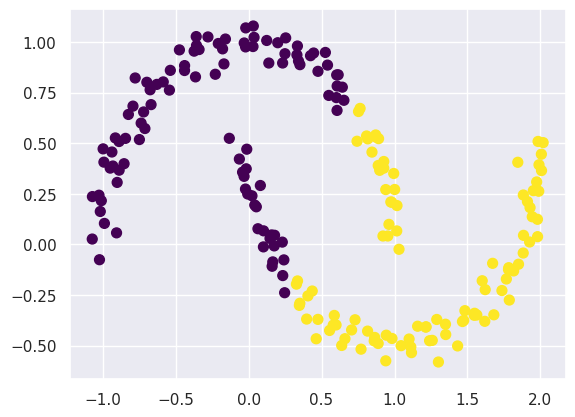

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

* labels = KMeans(2, random_state=0).fit_predict(X):
* KMeans(2, random_state=0): Membuat model KMeans untuk membagi data menjadi 2 cluster (karena dataset bulan sabit biasanya terdiri dari 2 kelompok).
* 2: Menunjukkan bahwa kita meminta algoritma KMeans untuk membagi data menjadi 2 cluster.
* random_state=0: Seed untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
* .fit_predict(X):
* fit(X): Melatih model KMeans dengan data X.
* predict(X): Memprediksi cluster yang sesuai untuk setiap titik data dalam X.
* Hasilnya adalah labels, sebuah array yang menyimpan label cluster (0 atau 1) untuk setiap titik dalam X.
* plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):
* plt.scatter(X[:, 0], X[:, 1], ...): Membuat scatter plot dengan koordinat sumbu-x diambil dari kolom pertama X dan sumbu-y diambil dari kolom kedua X.
* c=labels: Memberikan warna berbeda pada setiap titik data berdasarkan label cluster yang dihasilkan oleh KMeans. Ini membuat visualisasi dari dua cluster yang dihasilkan.
* s=50: Menetapkan ukuran setiap titik menjadi 50 piksel.
* cmap='viridis': Menggunakan palet warna viridis untuk memberikan warna gradasi yang indah pada setiap cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


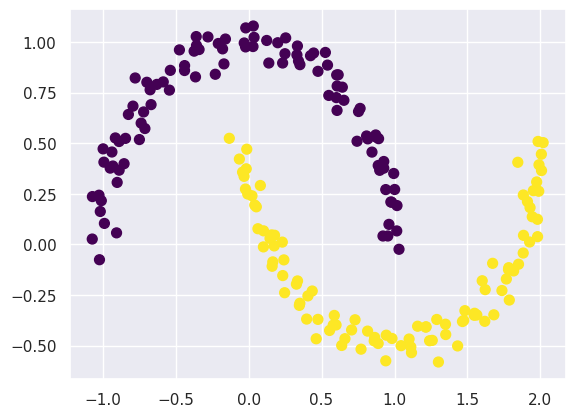

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* from sklearn.cluster import SpectralClustering: Mengimpor fungsi SpectralClustering dari pustaka Scikit-learn. Algoritma ini digunakan untuk clustering berbasis graf dengan pendekatan spectral, yang memanfaatkan hubungan antara titik-titik data.
* model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'): Membuat model Spectral Clustering dengan konfigurasi berikut:
* n_clusters=2: Menentukan bahwa kita ingin membagi data menjadi 2 cluster.
* affinity='nearest_neighbors': Menentukan cara menentukan hubungan antar titik data, dalam hal ini dengan menggunakan metode tetangga terdekat (nearest neighbors), yang menghitung jarak terdekat antara titik-titik data.
* assign_labels='kmeans': Setelah hubungan dihitung dan data dipetakan ke ruang berdimensi lebih rendah, KMeans digunakan untuk menentukan cluster mana setiap titik data akan masuk.
* labels = model.fit_predict(X):
* fit_predict(X): Melakukan dua hal:
* fit(X): Melatih model pada data X untuk menemukan cluster.
* predict(X): Menghasilkan label cluster untuk setiap titik dalam X.
* Hasil dari fit_predict(X) disimpan dalam variabel labels, yang berisi nilai 0 atau 1 untuk setiap titik dalam X, sesuai dengan cluster yang ditetapkan.
* plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):
* plt.scatter(X[:, 0], X[:, 1], ...): Membuat scatter plot, di mana:
* X[:, 0]: Menggunakan kolom pertama dari X sebagai koordinat sumbu-x.
* X[:, 1]: Menggunakan kolom kedua dari X sebagai koordinat sumbu-y.
* c=labels: Warna setiap titik ditentukan oleh label cluster yang dihasilkan oleh Spectral Clustering.
* s=50: Menentukan ukuran titik pada scatter plot menjadi 50 piksel.
* cmap='viridis': Menggunakan palet warna viridis untuk memberikan gradasi warna yang berbeda untuk setiap cluster.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

* from sklearn.datasets import load_digits: Mengimpor fungsi load_digits dari pustaka Scikit-learn. Dataset digits adalah kumpulan gambar digit yang sudah tersegmentasi, biasanya digunakan untuk tugas pengenalan angka (digit recognition). Setiap digit merupakan gambar 8x8 piksel yang mewakili angka dari 0 hingga 9.
* digits = load_digits(): Memuat dataset digit ke dalam variabel digits. Dataset ini berisi gambar digit (fitur) dan labelnya. Struktur dataset ini biasanya berupa Bunch object, yang mirip dengan dictionary, dengan atribut seperti data (fitur), target (label), dan images (data gambar dalam bentuk 2D).
* digits.data.shape:
* digits.data: Mengakses data fitur dalam dataset digits. Setiap gambar 8x8 piksel "diratakan" menjadi sebuah vektor dengan panjang 64, sehingga tiap digit direpresentasikan sebagai array 1D dengan 64 elemen.
* shape: Mengembalikan dimensi dari array digits.data. Biasanya output dari perintah ini berupa (n_samples, n_features), di mana n_samples adalah jumlah gambar (contoh data) dalam dataset, dan n_features adalah jumlah fitur (64 piksel per gambar).

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

* kmeans = KMeans(n_clusters=10, random_state=0):

* KMeans: Menginisiasi algoritma K-Means Clustering dari pustaka Scikit-learn.
* n_clusters=10: Menentukan bahwa kita ingin membagi data ke dalam 10 cluster. Karena dataset digits berisi angka dari 0 hingga 9, masuk akal untuk menggunakan 10 cluster.
* random_state=0: Menetapkan seed untuk pengacakan sehingga hasilnya konsisten setiap kali kode dijalankan.
* clusters = kmeans.fit_predict(digits.data)

* fit_predict(digits.data): Melakukan dua langkah:
fit(digits.data): Melatih model K-Means pada data gambar digits.data yang memiliki 1797 sampel dan 64 fitur (piksel dari gambar 8x8).
* predict(digits.data): Memprediksi cluster untuk setiap sampel dalam digits.data setelah model dilatih. Hasil prediksi cluster ini disimpan dalam variabel clusters, yang merupakan array berisi label cluster untuk setiap sampel.
* kmeans.cluster_centers_.shape:

* kmeans.cluster_centers_: Mengakses pusat cluster yang dihitung oleh algoritma K-Means. Setelah model dilatih, K-Means menentukan pusat dari masing-masing 10 cluster (dalam hal ini setiap pusat cluster merupakan vektor yang panjangnya 64, sesuai dengan jumlah fitur/piksel).
* shape: Menampilkan dimensi dari pusat cluster. Hasilnya akan berupa (10, 64), yang berarti ada 10 pusat cluster (karena kita memilih 10 cluster), dan setiap pusat cluster direpresentasikan oleh 64 nilai (fitur/piksel).


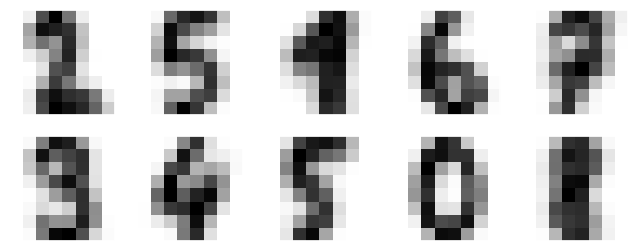

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

* fig, ax = plt.subplots(2, 5, figsize=(8, 3)): Membuat figure dan axes (2 baris dan 5 kolom) untuk menampilkan 10 gambar dalam tata letak grid.
* figsize=(8, 3): Menentukan ukuran total dari figure, di mana lebar adalah 8 inci dan tinggi 3 inci.
* centers = kmeans.cluster_centers_.reshape(10, 8, 8):

* kmeans.cluster_centers_: Mengakses pusat cluster hasil dari model K-Means. Setiap pusat cluster direpresentasikan sebagai vektor dengan panjang 64 (sesuai dengan jumlah fitur atau piksel dari gambar 8x8).
* reshape(10, 8, 8): Mengubah pusat cluster yang awalnya berupa vektor 1D (64 elemen) menjadi bentuk 2D (8x8) agar dapat divisualisasikan sebagai gambar. Di sini, kita punya 10 pusat cluster, masing-masing berbentuk gambar 8x8.
* for axi, center in zip(ax.flat, centers):: Melakukan iterasi melalui setiap subplot (axi) dan setiap pusat cluster (center). ax.flat adalah cara untuk mengakses semua subplot (total 10) dalam bentuk array 1D.
* zip(ax.flat, centers): Menggabungkan subplot dengan pusat cluster sehingga kita dapat menampilkan setiap pusat cluster pada subplot yang sesuai.
* axi.set(xticks=[], yticks=[]): Menghapus label sumbu x dan y dari subplot (supaya lebih bersih dan fokus pada gambar).
* axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary):

* axi.imshow(center): Menampilkan pusat cluster sebagai gambar 8x8 pada subplot axi.
* interpolation='nearest': Mengatur jenis interpolasi gambar, yang dalam hal ini adalah 'nearest' untuk menjaga agar setiap piksel ditampilkan tanpa interpolasi yang halus.
* cmap=plt.cm.binary: Menggunakan skema warna biner (hitam-putih) untuk menampilkan gambar.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

* from scipy.stats import mode: Mengimpor fungsi mode dari pustaka scipy. Fungsi mode digunakan untuk menemukan nilai yang paling sering muncul dalam array atau data (modus).
* labels = np.zeros_like(clusters): Membuat array labels dengan ukuran yang sama dengan clusters (yaitu label hasil prediksi K-Means).
np.zeros_like(clusters): Mengisi array labels ini dengan nol pada awalnya. Nanti, array ini akan diisi dengan label baru yang sesuai dengan label sebenarnya dari dataset.
* for i in range(10):: Memulai loop yang berjalan dari 0 hingga 9, karena kita memiliki 10 cluster (karena n_clusters=10 pada K-Means).
* mask = (clusters == i): Membuat mask yang merupakan array boolean. mask akan bernilai True untuk data yang termasuk dalam cluster i dan False untuk data yang tidak berada dalam cluster tersebut. Ini digunakan untuk memilih data dalam cluster tertentu.
* labels[mask] = mode(digits.target[mask])[0]:

* digits.target[mask]: Mengambil label asli (yaitu angka 0 hingga 9) dari data yang berada di cluster i dengan menggunakan mask.
* mode(digits.target[mask]): Menghitung modus (nilai yang paling sering muncul) dari label asli pada cluster i. Misalnya, jika cluster i sebagian besar berisi gambar angka 2, maka modus akan menjadi 2.
* [0]: Mengambil nilai modus (tanpa frekuensi kemunculannya).
* labels[mask] = mode(digits.target[mask])[0]: Mengisi labels dengan nilai modus tersebut untuk semua data yang ada di cluster i.
Kesimpulan:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

* from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung akurasi, yaitu persentase prediksi yang benar dari model dibandingkan dengan label sebenarnya.
* accuracy_score(digits.target, labels):

* digits.target: Merupakan label asli dari dataset digits (angka 0 hingga 9).
labels: Merupakan label yang dihasilkan setelah proses clustering dengan K-Means, yang telah disesuaikan dengan nilai modus di setiap cluster menggunakan kode sebelumnya.
* accuracy_score(digits.target, labels): Menghitung akurasi antara label asli (digits.target) dan label hasil clustering (labels). Akurasi dihitung dengan membandingkan berapa banyak prediksi label yang benar terhadap jumlah total data. Nilai akurasi berkisar dari 0 hingga 1, dengan 1 berarti semua prediksi benar.


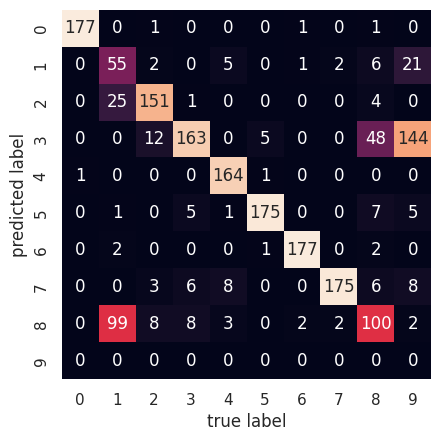

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

* from sklearn.metrics import confusion_matrix: Mengimpor fungsi confusion_matrix dari scikit-learn. Fungsi ini digunakan untuk menghitung matriks kebingungan (confusion matrix), yang menunjukkan perbandingan antara label sebenarnya dan label prediksi dalam bentuk tabel.
* mat = confusion_matrix(digits.target, labels):

* digits.target: Merupakan label asli dari dataset digits (yaitu angka 0 hingga 9).
* labels: Merupakan label hasil prediksi dari K-Means, yang telah disesuaikan menggunakan modus.
* confusion_matrix(digits.target, labels): Menghitung matriks kebingungan antara label asli dan label prediksi. Matriks ini akan menunjukkan berapa kali model memprediksi suatu angka dengan benar dan berapa kali salah.
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
* xticklabels=digits.target_names, yticklabels=digits.target_names):

* sns.heatmap: Fungsi dari seaborn yang digunakan untuk menampilkan matriks kebingungan sebagai heatmap (peta warna).
* mat.T: Matriks kebingungan yang telah ditranspose (T). Transpose diperlukan agar sumbu x mewakili label sebenarnya, dan sumbu y mewakili label prediksi.
* square=True: Membuat setiap kotak dalam heatmap berbentuk persegi.
annot=True: Menampilkan nilai numerik di setiap kotak (sel) dalam heatmap.
* fmt='d': Mengatur format angka dalam heatmap sebagai bilangan bulat (integer).
* cbar=False: Tidak menampilkan bar warna (color bar).
* xticklabels=digits.target_names: Menambahkan label angka (0-9) pada sumbu x (label sebenarnya).
* yticklabels=digits.target_names: Menambahkan label angka (0-9) pada sumbu y (label prediksi).
* plt.xlabel('true label'): Menambahkan label "true label" pada sumbu x yang mewakili label asli.
* plt.ylabel('predicted label'): Menambahkan label "predicted label" pada sumbu y yang mewakili label prediksi hasil clustering.

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

* from sklearn.manifold import TSNE: Mengimpor t-SNE (t-distributed Stochastic Neighbor Embedding), teknik untuk mereduksi dimensi data ke 2D atau 3D, sangat berguna untuk visualisasi data berdimensi tinggi.
* tsne = TSNE(n_components=2, init='random', random_state=0): Menginisialisasi objek t-SNE dengan parameter:
* n_components=2: Mengurangi dimensi data menjadi dua komponen (2D).
* init='random': Inisialisasi titik-titik proyeksi dilakukan secara acak.
* random_state=0: Menetapkan seed untuk mendapatkan hasil yang konsisten.
* digits_proj = tsne.fit_transform(digits.data):

* fit_transform: Melakukan reduksi dimensi pada digits.data (data asli dengan dimensi tinggi) menjadi data 2D yang disimpan dalam digits_proj.
kmeans = KMeans(n_clusters=10, random_state=0):
Menginisialisasi model K-Means dengan:
* n_clusters=10: Memilih 10 klaster karena dataset digits memiliki 10 digit (0-9).
* random_state=0: Agar hasil yang dihasilkan konsisten.
clusters = kmeans.fit_predict(digits_proj): Melakukan K-Means clustering pada data yang telah direduksi menjadi 2 dimensi menggunakan t-SNE dan menyimpan label klaster yang dihasilkan dalam variabel clusters.
* labels = np.zeros_like(clusters): Membuat array labels berukuran sama dengan clusters, diisi dengan nilai 0. Nantinya, array ini akan diisi dengan label digit asli yang sesuai dengan klaster yang dihasilkan.
* for i in range(10):: Memulai loop untuk mengunjungi setiap klaster dari 0 hingga 9.
* mask = (clusters == i): Membuat masker (array boolean) yang menunjukkan elemen mana yang masuk ke klaster ke-i.
* labels[mask] = mode(digits.target[mask])[0]: Menentukan label yang paling umum (modus) dalam digits.target untuk setiap klaster dan menetapkan label tersebut ke semua data dalam klaster tersebut.
* accuracy_score(digits.target, labels): Menghitung akurasi prediksi dengan membandingkan digits.target (label asli) dan labels (label prediksi hasil clustering).

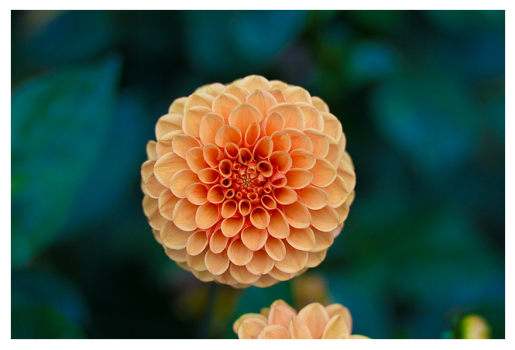

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

* from sklearn.datasets import load_sample_image: Mengimpor fungsi load_sample_image dari scikit-learn, yang digunakan untuk memuat gambar contoh (sample image) yang sudah tersedia di dalam pustaka scikit-learn.
* flower = load_sample_image("flower.jpg"): Memuat gambar dengan nama file "flower.jpg" dari dataset gambar bawaan scikit-learn dan menyimpannya dalam variabel flower. Gambar ini adalah salah satu contoh gambar bunga yang sudah ada di dalam pustaka.
* ax = plt.axes(xticks=[], yticks=[]): Membuat objek axes pada matplotlib tanpa ticks (skala sumbu) untuk sumbu x dan y, sehingga tampilannya bersih tanpa penanda skala.
* ax.imshow(flower): Menampilkan gambar flower pada objek axes yang sudah dibuat menggunakan fungsi imshow. Fungsi ini digunakan untuk menampilkan data gambar dalam bentuk matriks piksel di matplotlib.

In [ ]:
flower.shape

(427, 640, 3)

Kode flower.shape digunakan untuk mengetahui dimensi atau bentuk dari gambar yang disimpan dalam variabel flower.

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Kode ini pertama-tama menormalisasi nilai warna gambar, kemudian mengubah data gambar 3D menjadi array 2D dengan satu piksel per baris dan tiga kolom untuk kanal warna (RGB). data.shape akan mengembalikan bentuk baru yaitu (273280, 3), yang berarti ada 273,280 piksel dalam gambar, masing-masing dengan tiga nilai warna (RGB).

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

1. def plot_pixels(data, title, colors=None, N=10000):
Mendefinisikan fungsi dengan beberapa parameter:
data: Array yang berisi data piksel gambar yang sudah dinormalisasi (dalam bentuk [R, G, B]).
title: Judul plot.
colors: Pilihan warna untuk setiap titik dalam plot. Jika tidak disediakan, warna piksel akan digunakan.
N: Jumlah piksel yang akan dipilih secara acak untuk diplot, defaultnya adalah 10.000 piksel.
2. if colors is None:
Memeriksa apakah parameter colors diberikan. Jika tidak diberikan, maka digunakan data sebagai warna untuk scatter plot.
3. rng = np.random.RandomState(0):
Membuat objek random number generator (RNG) dengan seed 0 untuk memastikan hasil yang sama setiap kali kode ini dijalankan (agar pemilihan acak konsisten).
4. i = rng.permutation(data.shape[0])[:N]:
Membuat array acak dari indeks data sepanjang data.shape[0] (jumlah total piksel), kemudian memilih N (10.000) pertama dari indeks tersebut.
Ini dilakukan untuk memilih subset acak dari piksel yang akan diplot.
5. colors = colors[i]:
Mengambil subset warna sesuai dengan indeks acak i yang dipilih di atas.
6. R, G, B = data[i].T:
Mengekstrak kanal warna R (Red), G (Green), dan B (Blue) dari data yang telah dipilih secara acak, dengan mentranspose array data[i] sehingga masing-masing kanal warna menjadi vektor terpisah (R, G, dan B).
7. fig, ax = plt.subplots(1, 2, figsize=(16, 6)):
Membuat dua subplot (dua scatter plot) dalam satu baris dengan ukuran 16x6 inci.
8. ax[0].scatter(R, G, color=colors, marker='.'):
Membuat scatter plot untuk kanal warna Red (R) di sumbu x dan kanal warna Green (G) di sumbu y. Warna tiap titik diambil dari colors (yaitu, warna asli piksel).
marker='.' berarti titik pada scatter plot berbentuk kecil.
9. ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1)):
Menambahkan label pada sumbu x dan y dengan batas nilai 0 hingga 1 (karena data telah dinormalisasi menjadi 0-1).
10. ax[1].scatter(R, B, color=colors, marker='.'):
Membuat scatter plot kedua untuk kanal warna Red (R) di sumbu x dan kanal warna Blue (B) di sumbu y.
11. ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1)):
Menambahkan label pada sumbu x dan y untuk plot kedua dengan batas nilai 0 hingga 1.
12. fig.suptitle(title, size=20);:
Menambahkan judul utama pada kedua plot dengan ukuran font 20 sesuai dengan parameter title yang diberikan.

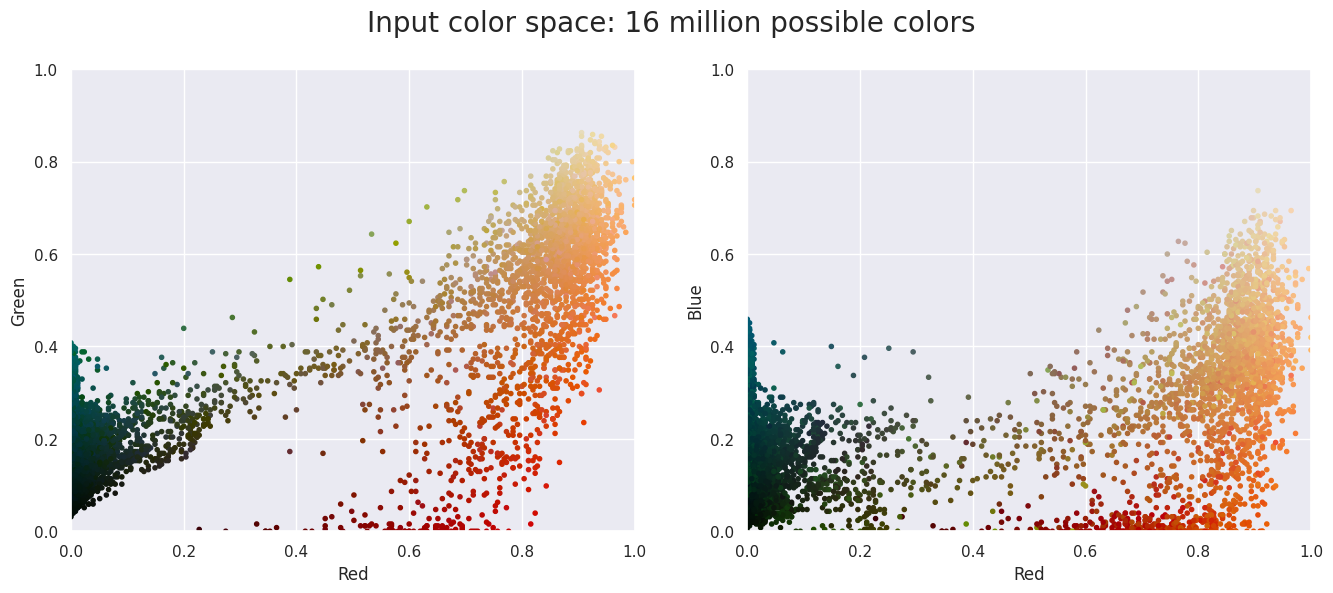

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

1. plot_pixels(data, ...)
Memanggil fungsi plot_pixels dengan parameter data dan title.
data adalah array yang berisi informasi warna piksel gambar yang telah dinormalisasi (nilai piksel dibagi dengan 255 sehingga berada dalam rentang 0 hingga 1). Dalam konteks ini, data berisi informasi tentang warna setiap piksel dari gambar yang akan divisualisasikan.
2. title='Input color space: 16 million possible colors'
Menetapkan parameter title untuk fungsi tersebut, yang akan menjadi judul dari plot. Judul ini menjelaskan bahwa ruang warna input memiliki 16 juta kemungkinan warna.

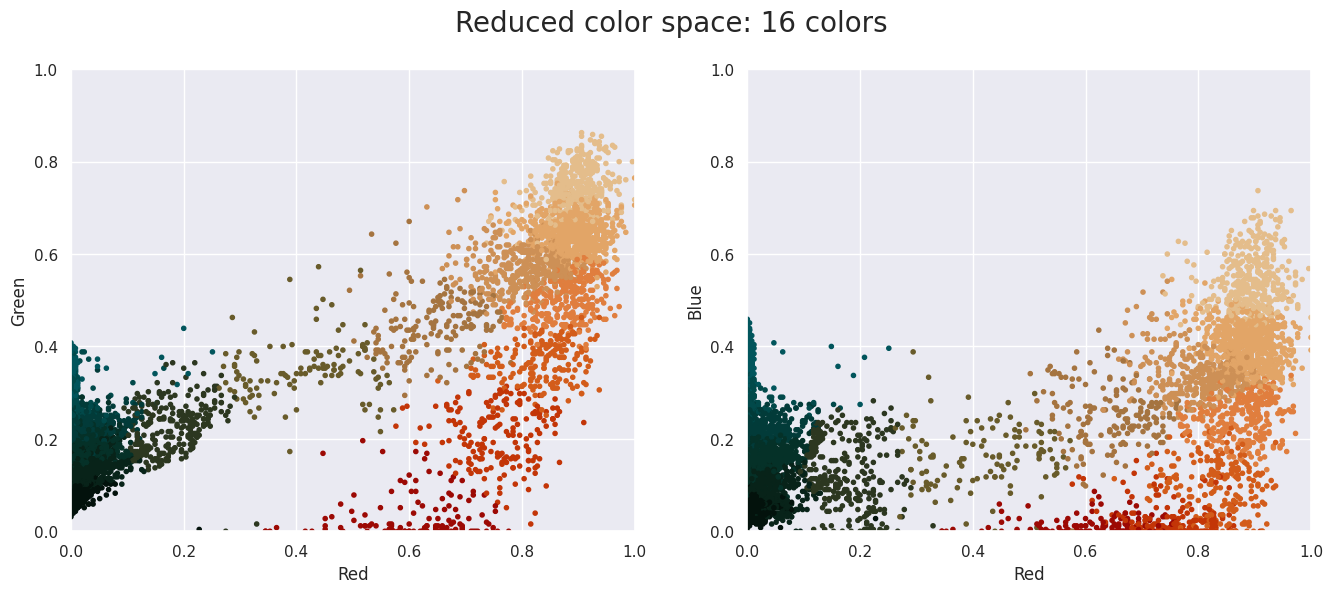

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

1. import warnings; warnings.simplefilter('ignore')
import warnings: Mengimpor modul warnings, yang digunakan untuk mengelola peringatan yang dihasilkan oleh kode Python.
warnings.simplefilter('ignore'): Mengatur filter untuk mengabaikan (ignore) semua peringatan yang mungkin muncul selama eksekusi kode. Ini bisa berguna untuk menghindari peringatan yang tidak relevan atau mengganggu, terutama saat menggunakan pustaka seperti NumPy yang mungkin menghasilkan peringatan.
2. from sklearn.cluster import MiniBatchKMeans
Mengimpor kelas MiniBatchKMeans dari pustaka sklearn.cluster.
MiniBatchKMeans adalah versi yang lebih efisien dari algoritma KMeans standar yang menggunakan subset acak dari data (mini-batch) untuk mempercepat pelatihan, terutama pada dataset yang besar.
3. kmeans = MiniBatchKMeans(16)
Menginisialisasi objek kmeans dengan 16 kluster. Ini berarti algoritma akan mengelompokkan data menjadi 16 warna yang berbeda.
Parameter ini menentukan jumlah warna yang ingin dipertahankan dalam gambar.
4. kmeans.fit(data)
Melatih model kmeans pada data warna yang telah dinormalisasi (data).
Di sini, data adalah array yang berisi informasi piksel dari gambar yang telah dinormalisasi (dari nilai 0 hingga 1).
5. new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
kmeans.predict(data): Menggunakan model yang sudah dilatih untuk memprediksi label kluster untuk setiap piksel dalam data. Ini menghasilkan array yang menunjukkan kluster mana setiap piksel termasuk.
kmeans.cluster_centers_: Mengambil pusat kluster (warna) yang dihasilkan oleh algoritma setelah pelatihan.
new_colors: Membuat array baru yang berisi warna baru untuk setiap piksel, yang diambil dari pusat kluster berdasarkan label kluster yang diprediksi. Dengan cara ini, setiap piksel diganti dengan warna pusat kluster terdekat.
6. plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")
Memanggil fungsi plot_pixels untuk memvisualisasikan distribusi warna setelah pengurangan jumlah warna.
Mengatur parameter colors untuk menunjukkan warna baru yang dihasilkan oleh MiniBatchKMeans.
Menetapkan judul plot menjadi "Reduced color space: 16 colors", yang menunjukkan bahwa ruang warna telah direduksi menjadi 16 warna.

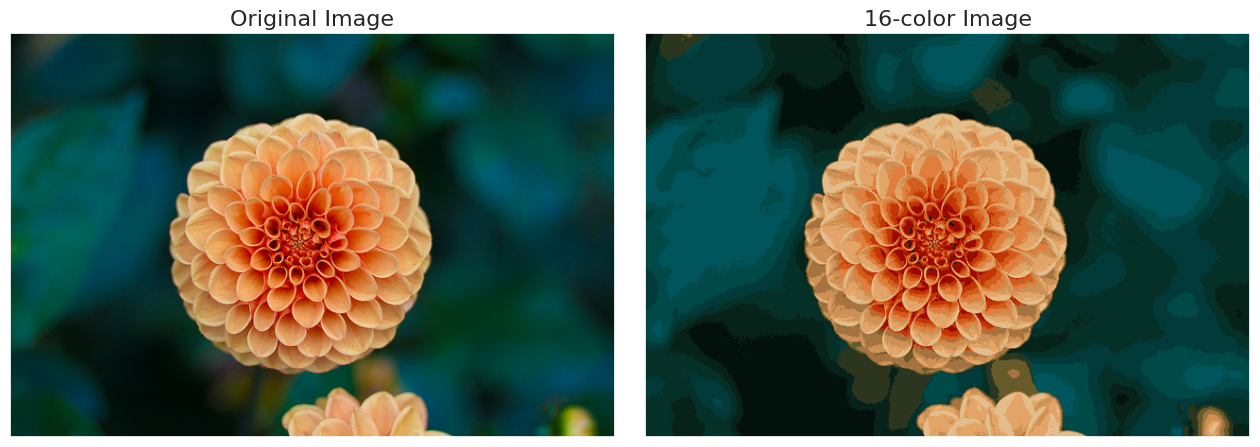

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

1. flower_recolored = new_colors.reshape(flower.shape)
new_colors: Array yang berisi warna baru untuk setiap piksel yang dihasilkan dari proses pengelompokan warna dengan MiniBatchKMeans.
reshape(flower.shape): Mengubah bentuk new_colors agar sesuai dengan bentuk asli gambar flower.
Hasil dari langkah ini adalah flower_recolored, yang merupakan representasi gambar dengan jumlah warna yang telah direduksi menjadi 16, namun tetap memiliki dimensi yang sama dengan gambar aslinya.
2. fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
plt.subplots: Membuat satu figure dan array dari subplot.
1, 2: Menentukan bahwa akan ada 1 baris dan 2 kolom dari subplot.
figsize=(16, 6): Mengatur ukuran figure menjadi 16 inci lebar dan 6 inci tinggi.
subplot_kw=dict(xticks=[], yticks=[]): Mengatur subplot untuk tidak menampilkan ticks pada sumbu x dan y, sehingga tampak lebih bersih.
Hasil dari langkah ini adalah objek fig untuk figure dan array ax untuk akses ke subplot.
3. fig.subplots_adjust(wspace=0.05)
Menyesuaikan ruang antara subplot dengan mengatur wspace (width space) menjadi 0.05. Ini memberikan sedikit ruang antara dua subplot sehingga tidak terlalu berdekatan.
4. ax[0].imshow(flower)
Menampilkan gambar asli flower pada subplot pertama (indeks 0) menggunakan metode imshow.
Gambar ditampilkan dalam skala warna yang sesuai.
5. ax[0].set_title('Original Image', size=16)
Menetapkan judul untuk subplot pertama (gambar asli) dengan teks "Original Image" dan ukuran font 16.
6. ax[1].imshow(flower_recolored)
Menampilkan gambar yang telah direduksi warnanya flower_recolored pada subplot kedua (indeks 1) menggunakan metode imshow.
Gambar ditampilkan dengan warna yang telah diolah melalui pengelompokan.
7. ax[1].set_title('16-color Image', size=16)
Menetapkan judul untuk subplot kedua (gambar yang telah direduksi) dengan teks "16-color Image" dan ukuran font 16.

# PRAKTIKUM 3

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=b586f9f148256b1f2349bbe8948e2e5d6475f49b5342d1f9669533f24ba1ad05
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

1. from minisom import MiniSom
Mengimpor kelas MiniSom dari pustaka minisom.
MiniSom adalah implementasi dari algoritma Self-Organizing Map, yang merupakan teknik pembelajaran tidak terawasi yang digunakan untuk mengelompokkan dan mereduksi dimensi data. Kelas ini memungkinkan pengguna untuk membuat dan melatih model SOM.
2. import numpy as np
Mengimpor pustaka NumPy dan memberi alias np.
NumPy adalah pustaka fundamental untuk komputasi numerik di Python. Pustaka ini menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematis untuk operasi pada array tersebut.
3. import matplotlib.pyplot as plt
Mengimpor modul pyplot dari pustaka Matplotlib dan memberi alias plt.
Matplotlib adalah pustaka untuk membuat visualisasi data. Modul pyplot menyediakan fungsi untuk membuat berbagai jenis grafik, termasuk grafik garis, histogram, dan scatter plot.
4. from sklearn import datasets
Mengimpor modul datasets dari pustaka sklearn (Scikit-learn).
Scikit-learn adalah pustaka untuk pembelajaran mesin yang menyediakan berbagai alat dan algoritma untuk pemodelan dan analisis data. Modul datasets berisi fungsi untuk memuat dataset yang sudah tersedia, seperti dataset iris, digit, dan lain-lain, yang sering digunakan untuk demonstrasi dan pengujian algoritma.

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

1. iris = datasets.load_iris()
Menggunakan fungsi load_iris() dari modul datasets dalam pustaka Scikit-learn.
Fungsi ini memuat dataset iris, yang terdiri dari 150 sampel dari tiga spesies bunga iris: Iris setosa, Iris versicolor, dan Iris virginica. Dataset ini memiliki 4 fitur (atau atribut) untuk masing-masing sampel:
Sepal length (panjang sepal)
Sepal width (lebar sepal)
Petal length (panjang petal)
Petal width (lebar petal)
Hasilnya adalah objek yang berisi data dan informasi lain tentang dataset, seperti nama fitur dan target (label).
2. data = iris.data
Mengakses atribut data dari objek iris yang dihasilkan oleh load_iris().
Atribut data ini adalah array dua dimensi yang berisi nilai fitur untuk semua sampel dalam dataset. Dalam kasus dataset iris, ini adalah array dengan dimensi (150, 4), di mana 150 adalah jumlah sampel dan 4 adalah jumlah fitur.
Dengan menyimpan iris.data ke dalam variabel data, Anda dapat dengan mudah mengakses dan menggunakan data fitur untuk analisis lebih lanjut, seperti pelatihan model pembelajaran mesin, visualisasi, atau pengelompokan.

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

1. data = data / data.max(axis=0)
data.max(axis=0): Metode max() dipanggil pada array data untuk menghitung nilai maksimum dari setiap kolom (fitur) dalam array.
Parameter axis=0 menunjukkan bahwa fungsi max() harus menghitung maksimum sepanjang sumbu vertikal, yaitu untuk setiap fitur di semua sampel.
Hasilnya adalah array satu dimensi yang berisi nilai maksimum untuk setiap fitur dalam dataset. Untuk dataset iris, ini akan mengembalikan array dengan 4 elemen, masing-masing merupakan nilai maksimum dari satu fitur (panjang dan lebar sepal, panjang dan lebar petal).
data / data.max(axis=0): Setelah mendapatkan nilai maksimum untuk setiap fitur, kode ini membagi setiap elemen dalam array data dengan nilai maksimum yang sesuai dari fitur tersebut.
Proses ini melakukan normalisasi data, mengubah nilai fitur sehingga berada dalam rentang 0 hingga 1. Setiap nilai dalam kolom fitur dibagi dengan nilai maksimum kolom tersebut.
Normalisasi ini penting dalam banyak algoritma pembelajaran mesin, karena membantu meningkatkan kinerja model dengan membuat data lebih seragam dan memudahkan konvergensi saat melakukan optimasi.

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

1. map_size = (10, 10)
Variabel map_size didefinisikan sebagai tuple yang berisi dua angka: (10, 10).
Ini menunjukkan ukuran dari peta (map) SOM yang akan dibuat, dengan 10 neuron di sepanjang sumbu horizontal (x) dan 10 neuron di sepanjang sumbu vertikal (y). Total neuron pada peta ini adalah 100.
2. som = MiniSom(...)
Di sini, kita membuat objek MiniSom dengan parameter-parameter yang diberikan.
MiniSom(...) adalah konstruktor dari kelas MiniSom, yang digunakan untuk membuat peta SOM dengan spesifikasi yang ditentukan. Parameter yang diberikan adalah sebagai berikut:
map_size[0]: 10 (jumlah neuron pada sumbu vertikal).
map_size[1]: 10 (jumlah neuron pada sumbu horizontal).
data.shape[1]: Jumlah fitur dalam data, yang diambil dari bentuk (shape) array data. Untuk dataset iris, ini bernilai 4, karena ada 4 fitur (panjang sepal, lebar sepal, panjang petal, dan lebar petal).
sigma=0.5: Parameter sigma mengontrol radius dari neighborhood saat pembelajaran. Nilai sigma yang lebih besar berarti neuron yang lebih jauh dari neuron pemenang juga akan dipengaruhi oleh pembaruan. Ini berfungsi untuk menentukan seberapa jauh pengaruh neuron pemenang pada neuron lainnya.
learning_rate=0.5: Ini adalah tingkat pembelajaran yang digunakan untuk memperbarui bobot neuron selama pelatihan. Tingkat pembelajaran yang lebih tinggi membuat neuron lebih responsif terhadap data, tetapi bisa membuat model lebih tidak stabil jika terlalu tinggi.

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

som: Ini adalah objek dari kelas MiniSom yang sudah diciptakan sebelumnya. Objek ini mewakili peta SOM yang akan digunakan untuk mengelompokkan data.

random_weights_init(data):

Fungsi ini digunakan untuk menginisialisasi bobot setiap neuron dalam peta SOM dengan nilai-nilai acak.
data: Parameter ini adalah dataset yang digunakan untuk menginisialisasi bobot. Dalam konteks ini, bobot neuron diinisialisasi berdasarkan dimensi fitur dalam dataset yang diberikan.
Neuron-neuron di SOM akan memiliki bobot yang sama dengan jumlah fitur dalam data. Ini akan membantu neuron memahami dan membedakan pola yang terdapat dalam data selama proses pelatihan.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

som: Ini adalah objek dari kelas MiniSom yang mewakili peta SOM yang telah diinisialisasi dan bobotnya sudah diset dengan nilai acak.

train_random(data, num_epochs):

data: Parameter ini adalah dataset yang akan digunakan untuk melatih peta SOM. Dataset ini berisi fitur-fitur yang ingin dipelajari oleh SOM.
num_epochs: Parameter ini menentukan jumlah iterasi (epoch) yang akan dilakukan selama pelatihan. Dalam hal ini, num_epochs diset menjadi 100, yang berarti peta SOM akan diperbarui 100 kali berdasarkan data yang diberikan.

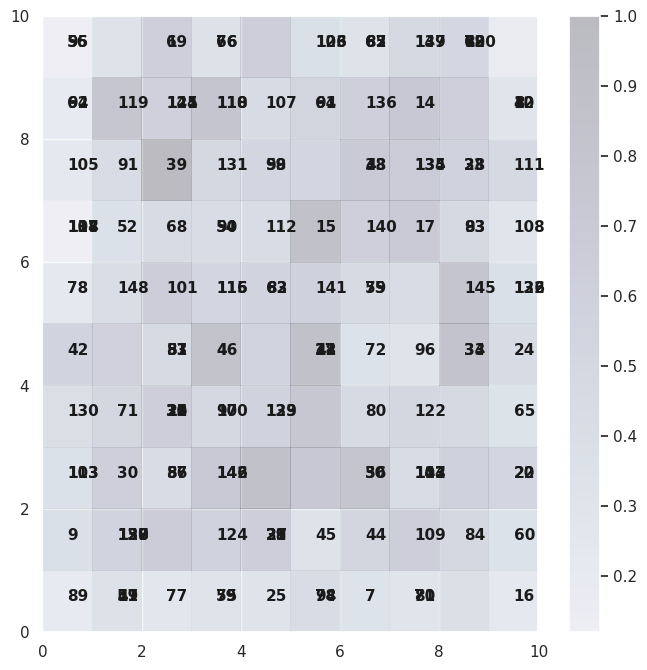

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

1. plt.figure(figsize=(8, 8)): Membuat sebuah figure baru untuk plot dengan ukuran 8x8 inci.
2. for i, x in enumerate(data):: Melakukan iterasi melalui setiap sampel data. enumerate(data) memberikan indeks i dan nilai x untuk setiap sampel dalam dataset.
3. w = som.winner(x): Menggunakan metode winner dari objek SOM untuk menentukan neuron pemenang (BMU) untuk setiap sampel x.
w akan berisi indeks dari neuron pemenang dalam format (baris, kolom).
4. plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11}): Menambahkan teks pada plot untuk menunjukkan indeks dari setiap sampel data.
w[0]+.5 dan w[1]+.5 menggeser posisi teks sedikit ke tengah dari neuron pemenang, sehingga lebih mudah terbaca.
str(i+1) mengkonversi indeks sampel ke string untuk ditampilkan.
color='k' mengatur warna teks menjadi hitam.
fontdict={'weight': 'bold', 'size': 11} mengatur gaya dan ukuran font teks.
5. plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2): Menggambar peta jarak dari SOM menggunakan pcolor.
som.distance_map() menghasilkan peta jarak antar neuron dalam SOM, yang menunjukkan seberapa jauh bobot neuron satu dengan yang lainnya.
.T mentranspose peta jarak agar sesuai dengan orientasi yang diinginkan untuk plot.
cmap='bone_r' memilih skema warna untuk peta (dalam hal ini, palet warna 'bone' dengan inverted).
alpha=.2 mengatur transparansi peta agar elemen lainnya (teks) tetap terlihat.
6. plt.colorbar(): Menambahkan colorbar ke plot untuk menunjukkan skala warna dari peta jarak.
7. plt.show(): Menampilkan plot yang telah dibuat.

# PRAKTIKUM 4

In [ ]:
pip install minisom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

1. import numpy as np: Mengimpor pustaka NumPy, yang merupakan salah satu pustaka paling populer di Python untuk melakukan komputasi numerik dan manipulasi array. Dengan menggunakan alias np, Anda bisa memanggil fungsi-fungsi dari NumPy dengan lebih singkat. Misalnya, alih-alih menulis numpy.array, Anda cukup menulis np.array.
2. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari pustaka Matplotlib, yang digunakan untuk membuat visualisasi data.
Alias plt memungkinkan Anda untuk menggunakan fungsi-fungsi dari pyplot dengan cara yang lebih ringkas. Misalnya, untuk membuat plot, Anda bisa menggunakan plt.plot().
3. from skimage import io: Mengimpor modul io dari pustaka scikit-image, yang merupakan pustaka untuk pemrosesan citra di Python.
Modul io menyediakan fungsi untuk membaca dan menulis gambar, memungkinkan Anda untuk memuat gambar dari file atau menyimpan gambar ke file.

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

1. def initialize_weights(input_shape, output_shape): Fungsi ini diberi nama initialize_weights dan menerima dua argumen:
input_shape: Ini diharapkan menjadi tuple yang menggambarkan dimensi data input. Misalnya, jika data input adalah gambar dengan dimensi tinggi, lebar, dan saluran warna (misalnya, RGB), maka input_shape bisa berupa (tinggi, lebar, saluran).
output_shape: Ini diharapkan menjadi tuple yang menggambarkan dimensi peta output. Biasanya, ini adalah ukuran grid untuk SOM, yang berupa (baris, kolom).
2. return np.random.rand(output_shape[0], output_shape[1], input_shape[2]) : Fungsi ini menggunakan np.random.rand dari pustaka NumPy untuk menginisialisasi bobot secara acak.
np.random.rand menghasilkan array dengan nilai acak yang terdistribusi secara uniform antara 0 dan 1.
Dimensi array yang dihasilkan adalah:
output_shape[0]: Jumlah baris (atau cluster) dalam SOM.
output_shape[1]: Jumlah kolom dalam SOM.
input_shape[2]: Jumlah saluran dalam data input (misalnya, 3 untuk gambar RGB).
Dengan demikian, bobot SOM akan memiliki bentuk (baris, kolom, saluran).

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

1. def calculate_distance(input_vector, weights): Fungsi ini diberi nama calculate_distance dan menerima dua argumen:
input_vector: Vektor input yang akan dibandingkan dengan bobot SOM. Biasanya, ini adalah satu contoh data yang ingin dikelompokkan (misalnya, piksel dari gambar dalam format RGB).
weights: Array bobot dari SOM, yang biasanya memiliki bentuk (baris, kolom, saluran), di mana saluran biasanya adalah jumlah fitur dari vektor input (misalnya, 3 untuk RGB).
2. return np.linalg.norm(input_vector - weights, axis=2) : Kode ini menghitung jarak antara input_vector dan setiap bobot dalam array weights menggunakan norma Euclidean.
input_vector - weights: Ini menghasilkan array baru yang merupakan selisih antara vektor input dan setiap bobot. Hasil dari operasi ini memiliki dimensi (baris, kolom, saluran).
np.linalg.norm(..., axis=2): Fungsi ini menghitung norma (jarak) untuk setiap pasangan vektor di sepanjang sumbu ke-2 (yaitu, dimensi saluran).
Jika input_vector memiliki bentuk (saluran,) dan weights memiliki bentuk (baris, kolom, saluran), hasil dari input_vector - weights akan memiliki bentuk (baris, kolom, saluran).
Dengan menggunakan axis=2, fungsi ini menghitung norma (jarak) untuk setiap pasangan vektor input dan bobot, menghasilkan array dengan bentuk (baris, kolom) yang menunjukkan jarak Euclidean antara vektor input dan setiap bobot di SOM.

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

1. def find_winner_unit_in_image(input_vector, weights): Fungsi ini diberi nama find_winner_unit_in_image dan menerima dua argumen:
input_vector: Vektor input yang akan dibandingkan dengan bobot SOM. Ini biasanya mewakili satu contoh data, seperti piksel dalam gambar.
weights: Array bobot dari SOM, yang biasanya memiliki bentuk (baris, kolom, saluran), di mana saluran adalah jumlah fitur dari vektor input.
2. distances = calculate_distance(input_vector, weights) : Fungsi ini memanggil fungsi calculate_distance untuk menghitung jarak antara input_vector dan setiap bobot dalam array weights.
Hasil dari perhitungan ini adalah array distances dengan bentuk (baris, kolom), yang berisi jarak Euclidean antara input_vector dan setiap bobot dalam SOM.
3. return np.unravel_index(np.argmin(distances), distances.shape) : np.argmin(distances): Fungsi ini mengembalikan indeks dari elemen terkecil dalam array distances. Indeks ini menunjukkan posisi unit dengan bobot yang paling mendekati vektor input.
np.unravel_index(..., distances.shape): Fungsi ini mengubah indeks 1D (yang dihasilkan dari np.argmin) menjadi indeks 2D sesuai dengan bentuk array distances. Ini penting karena kita ingin mendapatkan posisi baris dan kolom dari unit pemenang dalam grid SOM.
Hasilnya adalah sebuah tuple yang berisi dua nilai: indeks baris dan kolom dari unit pemenang.

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

1. def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius): Fungsi ini diberi nama update_weights dan menerima lima argumen:
input_vector: Vektor input yang digunakan untuk memperbarui bobot SOM. Ini biasanya merupakan contoh data, seperti piksel dalam gambar.
weights: Array bobot dari SOM dengan bentuk (baris, kolom, saluran), yang berisi bobot untuk setiap unit dalam SOM.
winner: Indeks dari unit pemenang (unit yang memiliki bobot terdekat dengan vektor input), biasanya diberikan sebagai tuple (baris, kolom).
learning_rate: Parameter yang mengontrol seberapa besar perubahan bobot dalam satu langkah pembaruan. Nilai ini biasanya berkurang seiring waktu.
neighborhood_radius: Radius lingkungan yang menentukan seberapa jauh unit tetangga akan dipengaruhi oleh pembaruan bobot. Unit yang lebih dekat ke unit pemenang akan memiliki pengaruh yang lebih besar.
2. distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2) : np.indices(weights.shape[:2]): Fungsi ini menghasilkan array yang berisi indeks untuk setiap unit dalam grid SOM, dengan bentuk (baris, kolom).
.T: Transpos dari array untuk memudahkan pengurangan dengan winner.
np.array(winner).reshape(1, -1): Indeks pemenang diubah menjadi bentuk yang sesuai untuk operasi pengurangan.
np.linalg.norm(..., axis=2): Menghitung jarak Euclidean dari setiap unit ke unit pemenang. Hasilnya adalah array distances dengan bentuk (baris, kolom), di mana setiap elemen berisi jarak dari unit tersebut ke unit pemenang.
3. influence = np.exp(-distances / (2 * neighborhood_radius**2)) : Menghitung fungsi pengaruh untuk setiap unit dalam SOM menggunakan rumus Gaussian.
Unit yang lebih dekat ke unit pemenang akan memiliki nilai pengaruh yang lebih besar. Hasilnya adalah array influence dengan bentuk (baris, kolom) yang berisi nilai pengaruh dari setiap unit berdasarkan jarak ke unit pemenang.
4. weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights) : (input_vector - weights): Menghitung perbedaan antara vektor input dan bobot untuk setiap unit. Ini memberikan arah pembaruan bobot.
influence[:, :, np.newaxis]: Menambahkan dimensi baru pada array pengaruh untuk memungkinkan perkalian elemen dengan bobot. Ini memungkinkan pengaruh diterapkan pada setiap saluran (fitur) dari bobot.
learning_rate * influence[:, :, np.newaxis] * (input_vector - weights): Menghitung perubahan bobot untuk setiap unit dengan mengalikan perbedaan (arah) dengan tingkat pembelajaran dan pengaruh.
weights += ...: Melakukan pembaruan bobot dengan menambahkan perubahan yang telah dihitung.

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

1. def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius): Fungsi ini diberi nama train_som dan menerima empat argumen:
image: Gambar input yang akan dilatih menggunakan SOM, dengan bentuk (tinggi, lebar, saluran).
num_epochs: Jumlah epoch untuk pelatihan SOM. Satu epoch adalah satu iterasi lengkap melalui seluruh data.
initial_learning_rate: Tingkat pembelajaran awal untuk mengontrol seberapa besar perubahan bobot dalam setiap langkah pembaruan.
initial_neighborhood_radius: Radius lingkungan awal yang menentukan seberapa jauh unit tetangga akan dipengaruhi oleh pembaruan bobot.
2. input_shape = image.shape
som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
weights = initialize_weights(input_shape, som_shape) : input_shape: Mendapatkan bentuk gambar input untuk menentukan ukuran bobot SOM.
som_shape: Ukuran SOM diinisialisasi menjadi (10, 10, saluran) untuk menciptakan grid 10x10, di mana setiap unit memiliki bobot untuk setiap saluran warna (misalnya, RGB).
weights: Bobot untuk SOM diinisialisasi dengan memanggil fungsi initialize_weights yang telah Anda definisikan sebelumnya.
3. for epoch in range(num_epochs): Memulai loop untuk setiap epoch dari 0 hingga num_epochs - 1.
4. learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs) : Tingkat pembelajaran dan radius lingkungan diperbarui secara eksponensial berdasarkan epoch saat ini. Ini bertujuan untuk mengurangi kedua nilai ini seiring dengan kemajuan pelatihan, sehingga membuat pembaruan bobot lebih halus di kemudian hari.
5. for i in range(input_shape[0]): for j in range(input_shape[1]):
    input_vector = image[i, j, :]
    winner = find_winner_unit_in_image(input_vector, weights)
    update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius) : Looping Melalui Piksel: Dua loop digunakan untuk iterasi melalui setiap piksel dalam gambar:
input_vector = image[i, j, :]: Mengambil vektor warna (saluran) untuk piksel di posisi (i, j).
winner = find_winner_unit_in_image(input_vector, weights): Mencari unit pemenang dalam SOM untuk vektor warna saat ini menggunakan fungsi find_winner_unit_in_image.
update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius): Memperbarui bobot SOM menggunakan vektor input, bobot saat ini, unit pemenang, tingkat pembelajaran, dan radius lingkungan.
6. return weights : Setelah pelatihan selesai, fungsi mengembalikan bobot yang telah diperbarui dari SOM.

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "Lenna.png"
Lenna = io.imread('/content/drive/MyDrive/Mesin Learning/Lenna.png') / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

1. from skimage import io : Import Modul: Sebelum menggunakan kode ini, Anda harus mengimpor modul yang diperlukan.
2. Lenna_path = "Lenna.png" : Variabel ini menyimpan nama file citra Lenna. Anda dapat mengganti nama file ini dengan nama file citra lain jika diperlukan.
3. Lenna = io.imread('/content/drive/MyDrive/Mesin Learning/Lenna.png') / 255.0 : io.imread(...): Fungsi ini digunakan untuk memuat citra dari path yang diberikan ('/content/drive/MyDrive/Mesin Learning/Lenna.png').
Normalisasi: Setelah citra dimuat, intensitas piksel citra dinormalisasi dengan membagi nilai piksel dengan 255.0. Ini mengubah rentang nilai piksel dari [0, 255] (rentang umum untuk citra 8-bit) menjadi rentang [0, 1], yang lebih umum digunakan dalam banyak aplikasi pemrosesan citra dan pembelajaran mesin.

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

1. num_epochs: Ini adalah jumlah epoch (iterasi) yang digunakan untuk melatih SOM. Dalam hal ini, SOM akan dilatih selama 100 epoch.
2. initial_learning_rate: Ini adalah laju pembelajaran awal yang digunakan dalam pembaruan bobot selama pelatihan. Laju pembelajaran ini akan menurun seiring berjalannya waktu. Dalam kode ini, nilai awalnya adalah 0.1.
3. initial_neighborhood_radius: Ini adalah radius tetangga awal yang menentukan seberapa besar area sekitar unit pemenang yang akan terpengaruh selama pembaruan bobot. Dalam kode ini, radius awalnya adalah 5. Radius ini juga akan menurun seiring dengan pelatihan.
4. trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius) : train_som(...): Ini adalah fungsi yang digunakan untuk melatih SOM menggunakan citra Lenna dan parameter yang telah ditentukan. Fungsi ini akan melakukan langkah-langkah berikut:
Menginisialisasi bobot SOM.
Melakukan pembaruan bobot berdasarkan setiap piksel dari citra Lenna selama jumlah epoch yang telah ditentukan.
Memperbarui laju pembelajaran dan radius tetangga sesuai dengan epoch saat ini.
trained_weights: Variabel ini menyimpan bobot yang telah dilatih dari SOM setelah proses pelatihan selesai. Bobot ini akan mencerminkan pola dan fitur dari citra Lenna yang telah diproses oleh SOM.


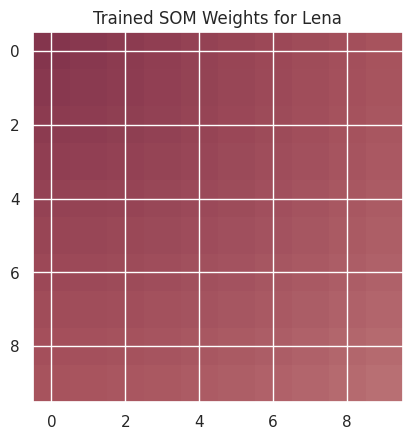

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

1. plt.imshow(trained_weights) : plt.imshow(trained_weights): Fungsi ini digunakan untuk menampilkan array trained_weights sebagai gambar. Array trained_weights merupakan bobot yang dihasilkan dari pelatihan SOM. Dalam konteks citra, setiap bobot mewakili warna atau fitur yang telah dipelajari oleh SOM dari citra Lenna.
Format Gambar: Jika trained_weights adalah array 2D yang mewakili bobot dari setiap unit dalam peta, maka imshow akan menampilkan peta tersebut sebagai gambar. Jika bobot memiliki lebih dari dua dimensi (misalnya, RGB), maka dimensi yang lebih tinggi biasanya akan diinterpretasikan sebagai saluran warna.
2. plt.title('Trained SOM Weights for Lena') : plt.title(...): Fungsi ini digunakan untuk menambahkan judul pada plot. Dalam hal ini, judul yang ditambahkan adalah "Trained SOM Weights for Lena", yang menunjukkan bahwa gambar yang ditampilkan adalah bobot yang telah dilatih dari SOM yang dilatih dengan citra Lenna.
3. plt.show() : Fungsi ini digunakan untuk menampilkan semua plot yang telah dibuat. Dalam hal ini, ini akan memunculkan jendela dengan gambar bobot SOM yang telah dilatih, lengkap dengan judul yang telah ditambahkan.

# TUGAS

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Memuat data dari 'Mall_Customers.csv'
data = pd.read_csv('/content/drive/MyDrive/Mesin Learning/Mall_Customers.csv')

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [3]:
# Pilih fitur yang ingin digunakan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Menentukan jumlah kluster yang diinginkan
num_clusters = 3  # Mengganti nilai menjadi 3

In [5]:
# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

In [6]:
# Melatih model K-Means
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [7]:
# Menambahkan label kluster ke data
data['Cluster'] = kmeans.labels_

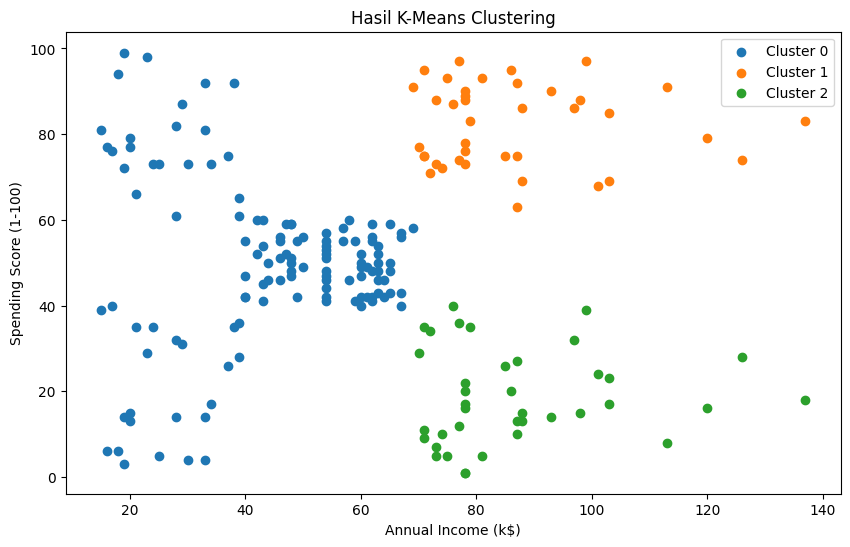

In [8]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.show()


3. Buatlah model K-Means dengan mempertimbangkan jumlah k
k yang terbaik.

In [9]:
# Menghilangkan kolom yang tidak diperlukan
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Menyimpan inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
for k in range(1, 11):  # Coba jumlah kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

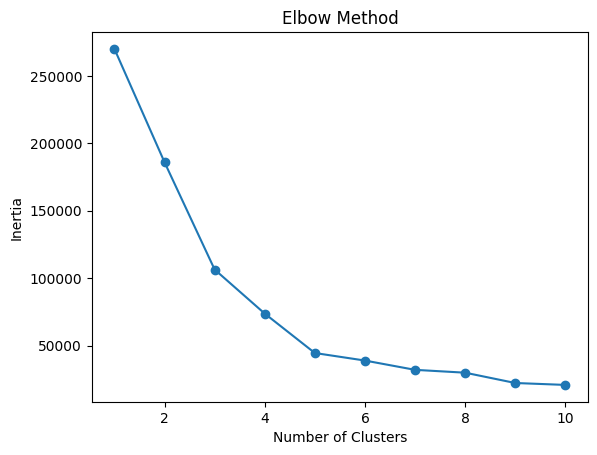

In [11]:
# Memplot inersia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [14]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=3e978fb6a3eb10761625548d1c4d9ee7c69a7fe2159d659d3d2a79c6b1a03a28
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [15]:
# Import Library
import cv2 as cv
import numpy as np
from minisom import MiniSom
from PIL import Image

In [16]:
image_path = "/content/drive/MyDrive/Mesin Learning/pinguin.jpg"
img = Image.open(image_path)
img_data = np.asarray(img)
img_data = img_data / 255.0  # Normalize pixel values to [0, 1]

In [17]:
flat_img_data = img_data.reshape(-1, 3)

In [18]:
som_dim = 10
som = MiniSom(som_dim, som_dim, 3, sigma=0.3, learning_rate=0.5)

In [19]:
som.train_random(flat_img_data, 100)
segmented_img = np.zeros_like(flat_img_data)

In [20]:
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img[i] = weights

In [21]:
segmented_img = segmented_img.reshape(img_data.shape)

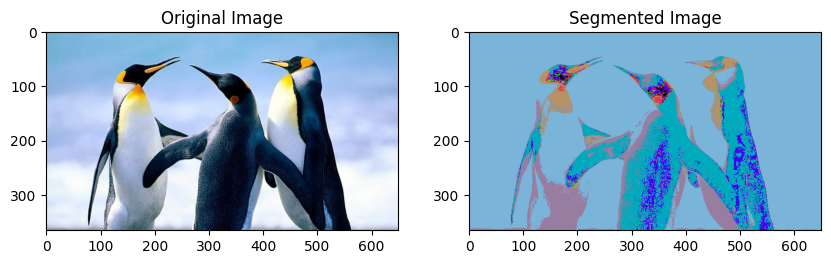

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()